In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

/home/outcast/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data_path = '../data/train.pickle'

In [3]:
data = pd.read_pickle(data_path)

In [4]:
def calc_metrics(y, y_pred):
    precission = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    accuracy = accuracy_score(y, y_pred)
    print(precission, recall, accuracy)

In [5]:
data_x = data['features'].reshape(data['features'].shape[0], -1)
data_y = data['labels']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y)

Easy

In [7]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(x_train, y_train)

In [8]:
y_pred = clf.predict(x_test)
calc_metrics(y_test, y_pred)

0.9423470383982363 0.942874043470497 0.9495402298850575


Решил вывести сразу accuracy, precission, recall, чтобы посмотреть с разных сторон на качество модели, как видно, все метрики высокие

In [9]:
matrix = confusion_matrix(y_test, y_pred)
np.fill_diagonal(matrix, 0)
np.unravel_index(matrix.argmax(), matrix.shape)

(5, 3)

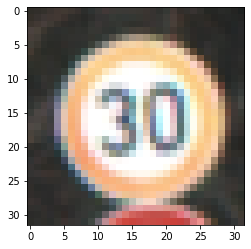

In [10]:
plt.imshow(data['features'][data['labels'] == 1][50], interpolation='nearest')
plt.show()

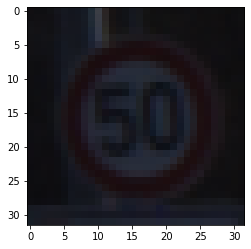

In [11]:
plt.imshow(data['features'][data['labels'] == 2][50], interpolation='nearest')
plt.show()

Чаще всего путаем предупреждение об ограничении на 30 км и на 50 км

Medium

In [12]:
neigh = KNeighborsClassifier()
neigh.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = neigh.predict(x_test)
calc_metrics(y_test, y_pred)

0.8905379776931828 0.8653578520717972 0.8681609195402299


In [14]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [15]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(x_train, y_train)

SVC()

In [16]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [17]:
bayes = MultinomialNB()
bayes.fit(x_train, y_train)

MultinomialNB()

In [18]:
print("Neigh:")
y_pred = neigh.predict(x_test)
calc_metrics(y_test, y_pred)
print("Naive bayes:")
y_pred = clf.predict(x_test)
calc_metrics(y_test, y_pred)
print("SVC rbf:")
y_pred = svc_rbf.predict(x_test)
calc_metrics(y_test, y_pred)
print("SVC linear:")
y_pred = svc_linear.predict(x_test)
calc_metrics(y_test, y_pred)
print("SVC poly:")
y_pred = svc_poly.predict(x_test)
calc_metrics(y_test, y_pred)
print("Naive bayes:")
y_pred = bayes.predict(x_test)
calc_metrics(y_test, y_pred)

Neigh:
0.8905379776931828 0.8653578520717972 0.8681609195402299
Naive bayes:
0.9423470383982363 0.942874043470497 0.9495402298850575
SVC rbf:
0.9258039869337286 0.8331214848822772 0.8716091954022989
SVC linear:
0.9438516972702016 0.9557579043803165 0.9541379310344827
SVC poly:
0.8608779661430758 0.6860931829916692 0.704367816091954
Naive bayes:
0.4219757862159224 0.35018566727204387 0.33402298850574713


Хуже всего работает наивный Байес, потому что нельзя сказать о независимости пикселей в картинке, например если есть красный круг в знаке, то понятно, что вероятность появления второго красного пикселя меняется, зная что появился первый, лучше всего себя показала логистическая регрессия и линейный SVC, возможно это говорит о линейной разделимости данных. 